<a href="https://colab.research.google.com/github/shivang1234gupta/CelebrityProfiling/blob/master/Genderclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import pandas as pd
y=pd.read_csv('drive/My Drive/Random/Output.csv')

In [9]:
corpus=[]
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [10]:
corpus = joblib.load('drive/My Drive/Random/cleaned (1).pkl') 

In [11]:
len(corpus)

14499

In [14]:
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
voc_size=5000
one_hot_rep=[ one_hot(word ,voc_size) for word in corpus ]

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [17]:
sent_len=250
embedded_docs=pad_sequences(sequences=one_hot_rep,maxlen=sent_len,padding='pre')

In [18]:
embedding_vector_feature=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_len))
model.add(Dropout(.8))
model.add(LSTM(embedding_vector_feature))
model.add(Dense(embedding_vector_feature,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          500000    
_________________________________________________________________
dropout (Dropout)            (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 590,601
Trainable params: 590,601
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['gen'] = le.fit_transform(y['gen'])

In [20]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y['gen'])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=40,test_size=.2)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=4,callbacks=[early_stop])

Epoch 1/4
182/182 [==============================] - 57s 315ms/step - loss: 0.5890 - accuracy: 0.7183 - val_loss: 0.5303 - val_accuracy: 0.7390
Epoch 2/4
182/182 [==============================] - 57s 313ms/step - loss: 0.4814 - accuracy: 0.7709 - val_loss: 0.5042 - val_accuracy: 0.7879
Epoch 3/4
182/182 [==============================] - 58s 316ms/step - loss: 0.5454 - accuracy: 0.7326 - val_loss: 0.5561 - val_accuracy: 0.7093
Epoch 4/4
182/182 [==============================] - 57s 313ms/step - loss: 0.4269 - accuracy: 0.8070 - val_loss: 0.5202 - val_accuracy: 0.7634


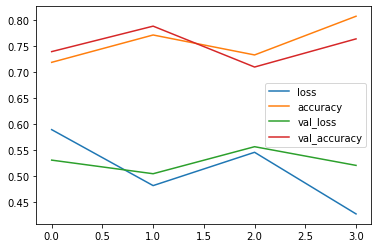

In [24]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot() 

In [25]:
predictions=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,predictions)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.56      0.66      0.61       804
     class 1       0.86      0.80      0.83      2093
     class 2       0.00      0.00      0.00         3

    accuracy                           0.76      2900
   macro avg       0.47      0.49      0.48      2900
weighted avg       0.78      0.76      0.77      2900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.763448275862069


In [28]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions,average='weighted')

0.7684195060442507